In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Clasificación de manzanas en función de su calidad

Dado el dataset *apple_quality* emplea el cross validation y un grid search para entrenar un modelo y a partir del mismo determinar las principales características que determinan la calidad de una manzana.

In [68]:
path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning/Clasificacion/data/apple_quality.csv"
df_apple = pd.read_csv(path, index_col = "A_id")
df_apple.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [69]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4001 entries, 0.0 to nan
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.3+ KB


In [70]:
df_apple.drop(df_apple.index[-1], axis=0, inplace = True)

In [71]:
# df_apples = apples.iloc[:-1]

In [72]:
df_apple['Acidity'] = df_apple['Acidity'].astype('float64') # Modificamos la columna acidity a tipo numerico (float)

In [73]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0.0 to 3999.0
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


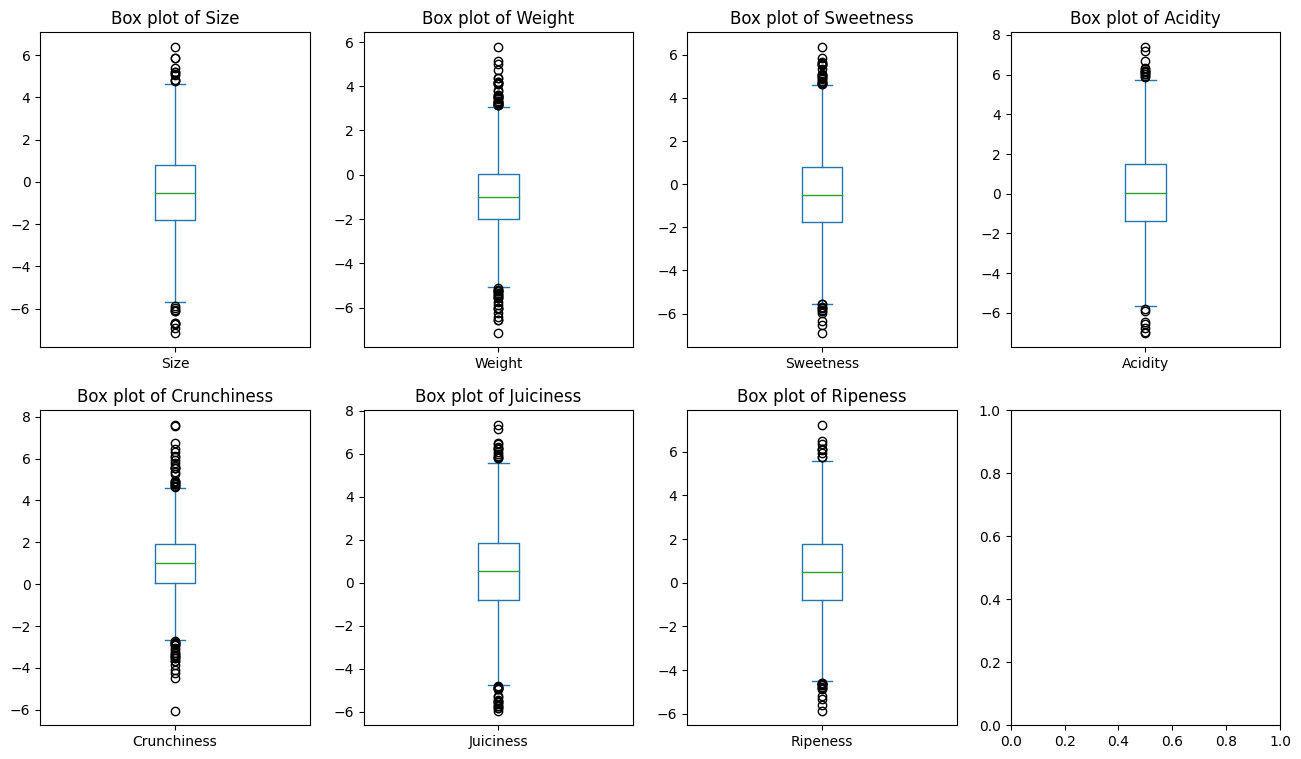

In [74]:
fig, axs = plt.subplots(2, 4, figsize=(16, 9))

df_apple['Size'].plot(kind="box", ax=axs[0, 0])
axs[0,0].set_title('Box plot of Size')

df_apple['Weight'].plot(kind="box", ax=axs[0, 1])
axs[0,1].set_title('Box plot of Weight')

df_apple['Sweetness'].plot(kind="box", ax=axs[0, 2])
axs[0,2].set_title('Box plot of Sweetness')

df_apple['Crunchiness'].plot(kind="box", ax=axs[1,0])
axs[1,0].set_title('Box plot of Crunchiness')

df_apple['Juiciness'].plot(kind="box", ax=axs[1,1])
axs[1,1].set_title('Box plot of Juiciness')

df_apple['Ripeness'].plot(kind="box", ax=axs[1,2])
axs[1,2].set_title('Box plot of Ripeness')

df_apple['Acidity'].plot(kind="box", ax=axs[0, 3])
axs[0,3].set_title('Box plot of Acidity')

plt.show()

In [75]:
def filtrar_outliers(df, nombre_columna):

  q1 = df[nombre_columna].quantile(.25)
  q3 = df[nombre_columna].quantile(.75)

  IQR = q3 - q1

  outliers_mask = (df[nombre_columna] > q1 - 1.5*IQR) & (df[nombre_columna] < q3 + 1.5*IQR)
  df = df[outliers_mask]

  return df

In [76]:
lista_columnas = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', "Acidity"]

In [77]:
for i in lista_columnas:
  df_apple = filtrar_outliers(df_apple, i)

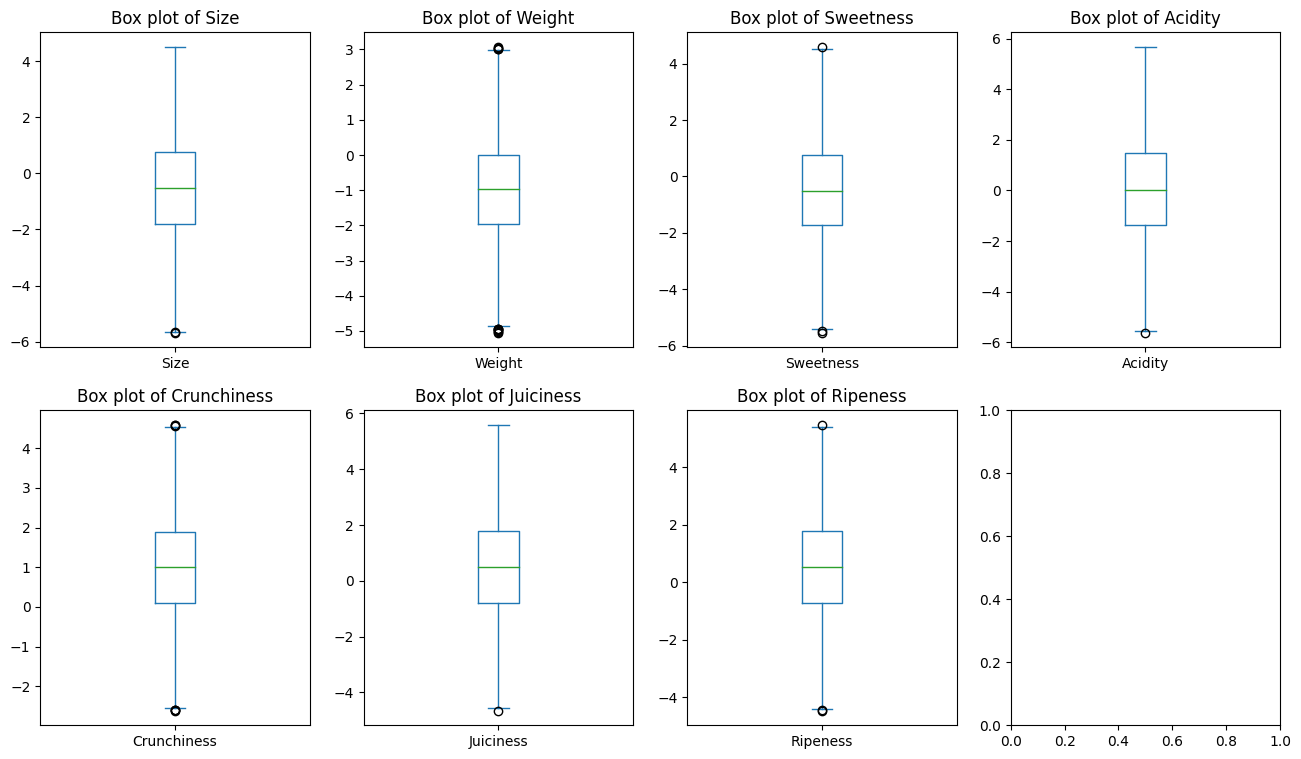

In [78]:
fig, axs = plt.subplots(2, 4, figsize=(16, 9))

df_apple['Size'].plot(kind="box", ax=axs[0, 0])
axs[0,0].set_title('Box plot of Size')

df_apple['Weight'].plot(kind="box", ax=axs[0, 1])
axs[0,1].set_title('Box plot of Weight')

df_apple['Sweetness'].plot(kind="box", ax=axs[0, 2])
axs[0,2].set_title('Box plot of Sweetness')

df_apple['Crunchiness'].plot(kind="box", ax=axs[1,0])
axs[1,0].set_title('Box plot of Crunchiness')

df_apple['Juiciness'].plot(kind="box", ax=axs[1,1])
axs[1,1].set_title('Box plot of Juiciness')

df_apple['Ripeness'].plot(kind="box", ax=axs[1,2])
axs[1,2].set_title('Box plot of Ripeness')

df_apple['Acidity'].plot(kind="box", ax=axs[0, 3])
axs[0,3].set_title('Box plot of Acidity')

plt.show()

In [79]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3786 entries, 1.0 to 3999.0
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3786 non-null   float64
 1   Weight       3786 non-null   float64
 2   Sweetness    3786 non-null   float64
 3   Crunchiness  3786 non-null   float64
 4   Juiciness    3786 non-null   float64
 5   Ripeness     3786 non-null   float64
 6   Acidity      3786 non-null   float64
 7   Quality      3786 non-null   object 
dtypes: float64(7), object(1)
memory usage: 266.2+ KB


## Estandarizar las variables numéricas

In [80]:
def standar_values(df, nombre_columna):

  min = df[nombre_columna].min()
  max = df[nombre_columna].max()

  df[nombre_columna] = (df[nombre_columna]- min)/(max - min)

  return df[nombre_columna]

In [81]:
lista_columnas = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', "Acidity"]

for i in lista_columnas:
  df_apple[i] = standar_values(df_apple, i)

In [82]:
df_apple.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
1.0,0.440142,0.272649,0.907206,0.583564,0.537783,0.536235,0.433889,good
2.0,0.528545,0.455442,0.375205,0.315870,0.731189,0.445278,0.729349,bad
3.0,0.492803,0.342381,0.676858,0.349801,0.809058,0.106213,0.567600,good
4.0,0.690653,0.462158,0.508515,0.286702,0.749917,0.318137,0.542092,good
5.0,0.221858,0.448342,0.357964,0.286318,0.079305,0.641407,0.234346,bad


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
df_apple_X = df_apple.drop("Quality", axis = 1)
df_apple_y = df_apple["Quality"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df_apple_X, df_apple_y, test_size=0.3, random_state=42)

In [86]:
random_forest = RandomForestClassifier()

In [87]:
# Generamos el diccionario con las listas de posibles valores:
param_grid = {
    'n_estimators': [80, 100, 120],  # Número de árboles
    'max_depth': [7, 10, 15], # Máxima profundidad de los árboles. Norma, logaritmo neperiano(numero_columnas) suele coincidir con el valor óptimo de max_depth
    'min_samples_split': [2, 5, 7], # Número mínimo de muestras para que se haga una separación
    # 'random_state' : [0, 132] # El estado de inicio del modelo
}

# Vamos a generar nuestro grid search:
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [88]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 15],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [80, 100, 120]},
             verbose=2)

In [89]:
print("Mejores parámetros: ", grid_search.best_params_)

Mejores parámetros:  {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 80}


In [90]:
y_predict = grid_search.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         bad       0.90      0.88      0.89       592
        good       0.87      0.89      0.88       544

    accuracy                           0.89      1136
   macro avg       0.89      0.89      0.89      1136
weighted avg       0.89      0.89      0.89      1136



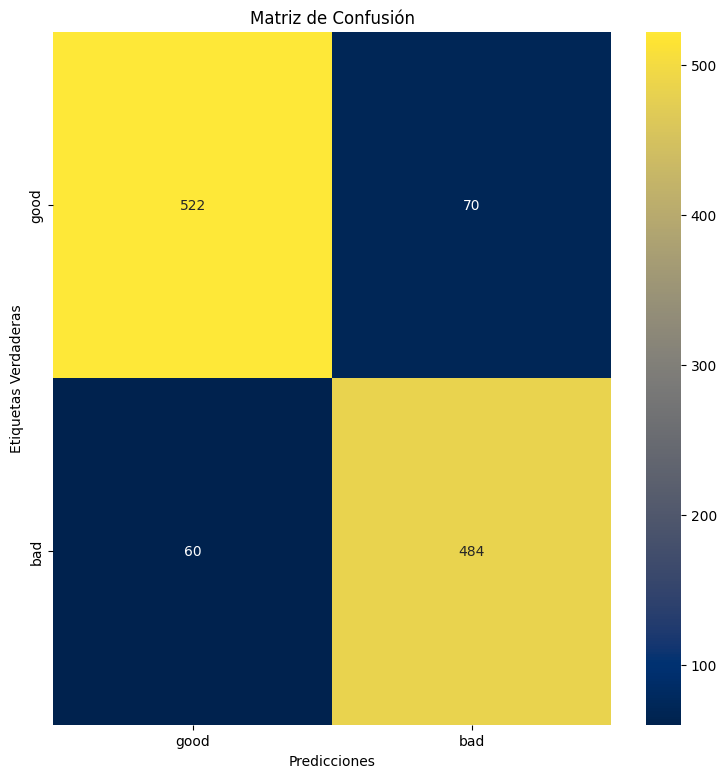

In [91]:
conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="cividis", xticklabels=["good", "bad"], yticklabels=["good", "bad"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

# Localizar la diabetes

Dado el dataset *diabetes* entrena un modelo de clasificación para localize de la manera más efectiva a los pacientes con prediabetes (empieza a tener síntomas de diabetes). Una vez lo hayas conseguido determina los tres parámetros que mejor caracterizan a la gente que empieza a presentar síntomas de diabetes

In [92]:
path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning/Clasificacion/data/diabetes.csv"
df = pd.read_csv(path)

## Data Analysis

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [94]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [95]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


- Nuestra target variable es `Diabetes_binary`. El valor 1 indica que sí tiene diabetes, mientras que el 0 indica que no.
- Hemos visto que el resto de columnas son de tipo float. Algunas de ellas son valores binarios, por lo que no es necesaria modificarlas.
- Comprobaremos cuales son las columnas que tienen valores que haya que normalizar antes de aplicar cualquier modelo.

In [96]:
def identify_boolean_columns(df):
    # Diccionario para almacenar los nombres de las columnas categorizadas
    columns_info = {
        'boolean_columns': [],
        'non_boolean_columns': []
    }

    # Iterar sobre las columnas del DataFrame
    for col in df.columns:
        unique_values = df[col].unique()

        # Verificar si los valores únicos son solo 0 y 1
        if set(unique_values).issubset({0.0, 1.0}):
            columns_info['boolean_columns'].append(col)
        else:
            columns_info['non_boolean_columns'].append(col)

    return columns_info

In [97]:
resultado = identify_boolean_columns(df)
print("Columnas booleanas:", resultado['boolean_columns'])
print("Columnas no booleanas:", resultado['non_boolean_columns'])

Columnas booleanas: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Columnas no booleanas: ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


In [98]:
columns_no_booleanas = resultado['non_boolean_columns']
columns_no_booleanas

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

- Filtramos los outliers

In [99]:
for i in columns_no_booleanas:
  df = filtrar_outliers(df, i)

- Normalizamos los valores de las columnas que no son booleanas

In [100]:
for i in columns_no_booleanas:
  df[i] = standar_values(df, i)

In [101]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,...,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000,45908.000000
mean,0.443648,0.519800,0.487671,0.974296,0.488652,0.442842,0.041888,0.112682,0.767230,0.635053,...,0.960290,0.055393,0.367833,0.076288,0.107252,0.128257,0.489435,0.612211,0.757978,0.730598
std,0.496820,0.499613,0.499853,0.158251,0.177653,0.496728,0.200336,0.316207,0.422601,0.481421,...,0.195279,0.228749,0.231456,0.209078,0.228309,0.334379,0.499894,0.252263,0.247925,0.283795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.366667,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000,0.571429
50%,0.000000,1.000000,0.000000,1.000000,0.466667,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000,0.857143
75%,1.000000,1.000000,1.000000,1.000000,0.600000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.818182,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Definimos y entrenamos nuestro modelo

In [102]:
df_X = df.drop("Diabetes_binary", axis = 1)
df_y = df["Diabetes_binary"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

### Random forest

In [104]:
random_forest = RandomForestClassifier()

In [105]:
# Generamos el diccionario con las listas de posibles valores:
param_grid = {
    'n_estimators': [80, 100, 120],  # Número de árboles
    'max_depth': [7, 10, 15], # Máxima profundidad de los árboles. Norma, logaritmo neperiano(numero_columnas) suele coincidir con el valor óptimo de max_depth
    'min_samples_split': [2, 5, 7], # Número mínimo de muestras para que se haga una separación
    # 'random_state' : [0, 132] # El estado de inicio del modelo
}

# Vamos a generar nuestro grid search:
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [106]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 15],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [80, 100, 120]},
             verbose=2)

In [107]:
print("Mejores parámetros: ", grid_search.best_params_)

Mejores parámetros:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 120}


In [108]:
y_predict = grid_search.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      7665
         1.0       0.71      0.73      0.72      6108

    accuracy                           0.74     13773
   macro avg       0.74      0.74      0.74     13773
weighted avg       0.74      0.74      0.74     13773



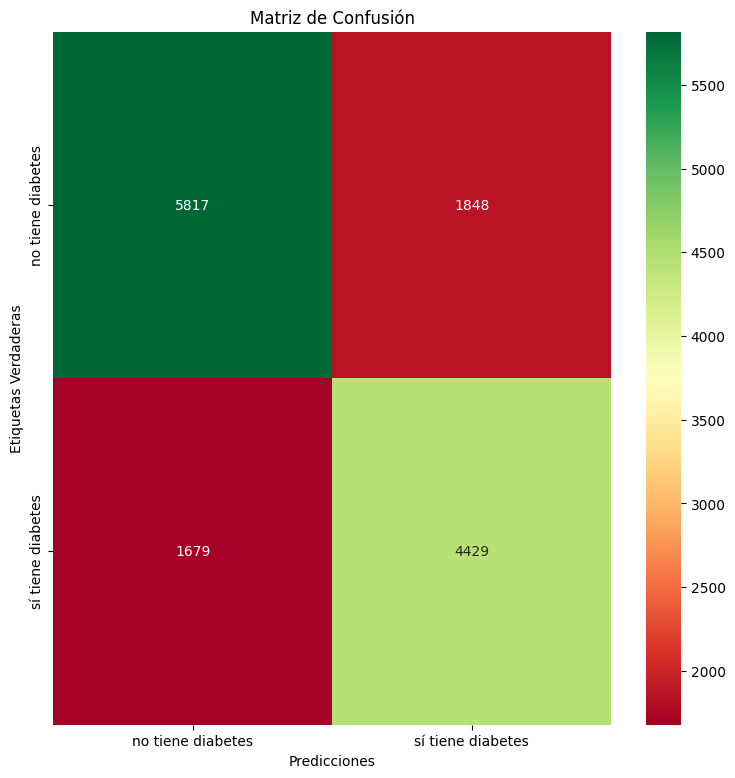

In [121]:
conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdYlGn", xticklabels=["no tiene diabetes", "sí tiene diabetes"], yticklabels=["no tiene diabetes", "sí tiene diabetes"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

In [112]:
best_random_forest = grid_search.best_estimator_

In [114]:
best_random_forest

RandomForestClassifier(max_depth=10, n_estimators=120)

In [113]:
importances = best_random_forest.feature_importances_

In [115]:
feature_importances = pd.DataFrame({'feature': df_X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

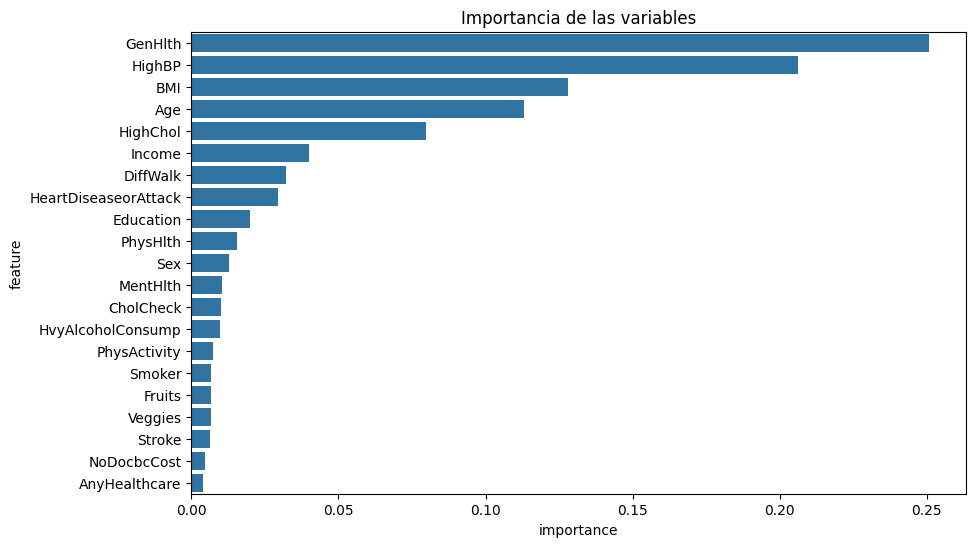

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importancia de las variables')
plt.show()

### KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
knn = KNeighborsClassifier()

In [133]:
param_grid = {'n_neighbors': np.arange(1, 31)}

In [134]:
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv=5, scoring='accuracy')

In [135]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [136]:
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Mejor valor de n_neighbors: {best_n_neighbors}")

Mejor valor de n_neighbors: 29


In [142]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

In [143]:
best_knn.score(X_test, y_test)

0.7199593407391273

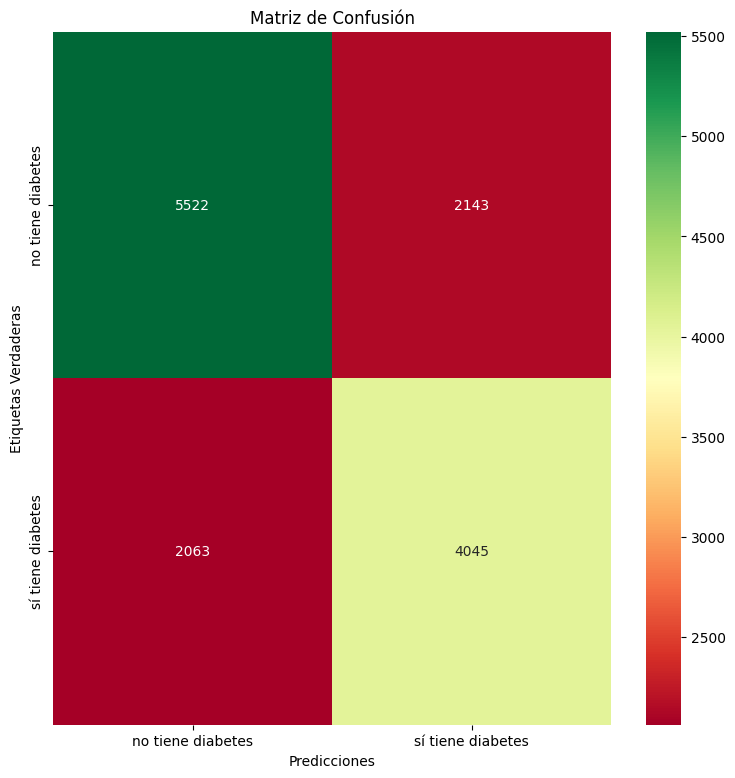

In [144]:
conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdYlGn", xticklabels=["no tiene diabetes", "sí tiene diabetes"], yticklabels=["no tiene diabetes", "sí tiene diabetes"]);
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()